# Reddit r/jokes Analysis

Setup: Run `downloader.py` to get your data. You may get some KeyError's - these are due to pushshift cutting requests short in order to reduce traffic. Restart the process from the latest year which wasn't yet saved to your machine.

Once you get your json files you can start the analysis!

## Imports

In [84]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import math

## Data loading and preprocessing

In [85]:
stop_words = set(stopwords.words('english'))

jokes = {}
for year in range(2010, 2020):
    jokes[year] = []
    with open(f'reddit_jokes_{year}.json') as json_file:
        year_jokes = json.load(json_file)
            
        year_jokes = [joke for joke in year_jokes if 'selftext' in joke.keys()]
        year_jokes = [joke for joke in year_jokes if joke['title'] not in ['[removed]', '[deleted]', 'removed', 'deleted', '']]
        year_jokes = [joke for joke in year_jokes if joke['selftext'] not in ['[removed]', '[deleted]', 'removed', 'deleted', '']]
        
        for joke in year_jokes:
            joke['year'] = year
            words = joke['title'] + ' ' + joke['selftext']
            # delete these since we absorbed them
            joke.pop('title', None)
            joke.pop('selftext', None)
            
            # we don't need these for now either
            joke.pop('created_utc', None)
            # joke.pop('url', None)
            
            # remove punctuation
            words = words.split()
            words = [''.join(ch for ch in word if ch.isalnum()) for word in words]

            # all words to lowercase
            words = [word.lower() for word in words]
            
            words = [word for word in words if word != '']
            # filter out english stopwords
            filtered_words = []
            for w in words: 
                if w not in stop_words: 
                    filtered_words.append(w)
                    
            joke['words'] = filtered_words
            
            
        jokes[year].extend(year_jokes)

In [86]:
total_joke_count = 0
for year in range(2010, 2020):
    crt = len(jokes[year])
    print(f'Number of jokes from {year}: {crt}')
    total_joke_count += crt
    
print(f'Total: {total_joke_count}')

Number of jokes from 2010: 247
Number of jokes from 2011: 3860
Number of jokes from 2012: 12114
Number of jokes from 2013: 15969
Number of jokes from 2014: 31323
Number of jokes from 2015: 63644
Number of jokes from 2016: 52384
Number of jokes from 2017: 43411
Number of jokes from 2018: 66188
Number of jokes from 2019: 72127
Total: 361267


In [87]:
print(jokes[2011][0])

{'num_comments': 23, 'over_18': False, 'score': 14, 'url': 'http://www.reddit.com/r/Jokes/comments/euhyt/the_old_soldiers_home/', 'year': 2011, 'words': ['old', 'soldiers', 'home', 'historian', 'visiting', 'retirement', 'home', 'old', 'soldiers', 'turned', 'heard', 'others', 'stories', 'jokes', 'often', 'assigned', 'number', 'six', 'one', 'would', 'shout', 'corner', 'old', 'men', 'rocking', 'chairs', 'would', 'give', 'chuckle', 'fourteen', 'another', 'yelled', 'side', 'room', 'bigger', 'laugh', 'erupted', 'assembled', 'group', 'wanting', 'part', 'fun', 'historian', 'joined', 'three', 'got', 'nothing', 'whats', 'wrong', 'didnt', 'anyone', 'laugh', 'historian', 'asked', 'nearest', 'retiree', 'old', 'man', 'replied', 'ehh', 'didnt', 'tell', 'right']}


# General overview

Since our analysis is limited in that we only extracted at most 7000 jokes for each month in the analysis' period, we should take all of this data with a grain of salt as there might have been many, many more posts that have gone unnoticed.

## r/Jokes subscribers

![](subscribers.png "Subsriber count evolution (thanks to subredditstats.com)")

Current number of subscribers (as of Apr. 2020): **18.3M**

**This aspect above is really important! The number of subscribers influences all of the numbers below!**

## By year

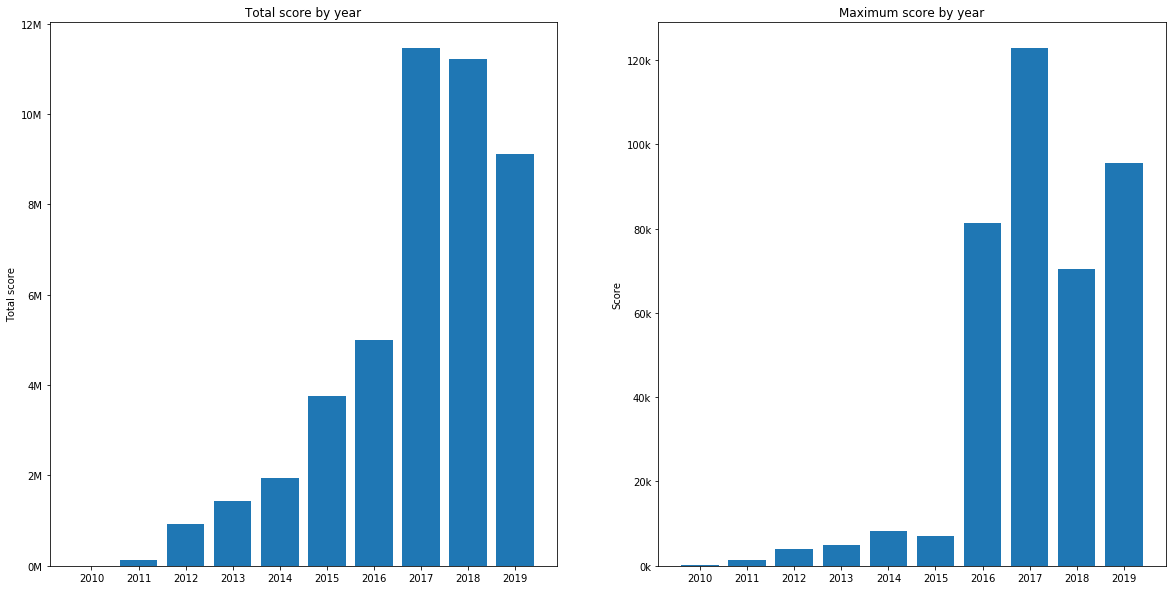

In [88]:
total_score = {}
max_score = {}

years = range(2010, 2020)
for year in years:
    total_score[year] = 0
    max_score[year] = 0
    for joke in jokes[year]:
        total_score[year] += joke['score']
        if max_score[year] < joke['score']:
            max_score[year] = joke['score']


fig, (syear, myear) = plt.subplots(1, 2, figsize=(20, 10))

syear.bar(years, [total_score[year]/1000000 for year in years])
syear.set_xticks(years)
syear.set_ylabel('Total score')
syear.set_yticks(range(0, 13, 2))
syear.set_yticklabels([f'{score}M' for score in range(0, 13, 2)])
syear.set_title('Total score by year')

myear.bar(years, [max_score[year]/1000 for year in years])
myear.set_xticks(years)
myear.set_yticks(range(0, 121, 20))
myear.set_yticklabels([f'{score}k' for score in range(0, 121, 20)])
myear.set_ylabel('Score')
myear.set_title('Maximum score by year')

plt.show()

## By score

In [89]:
all_jokes = []
years = range(2010, 2020)
for year in years:
    all_jokes.extend(jokes[year])

In [90]:
score_limits = [0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
jokes_by_score = {}
for limit in score_limits:
    jokes_by_score[limit] = 0

for joke in all_jokes:
    for limit in score_limits:
        if joke['score'] <= limit:
            jokes_by_score[limit] += 1
            break

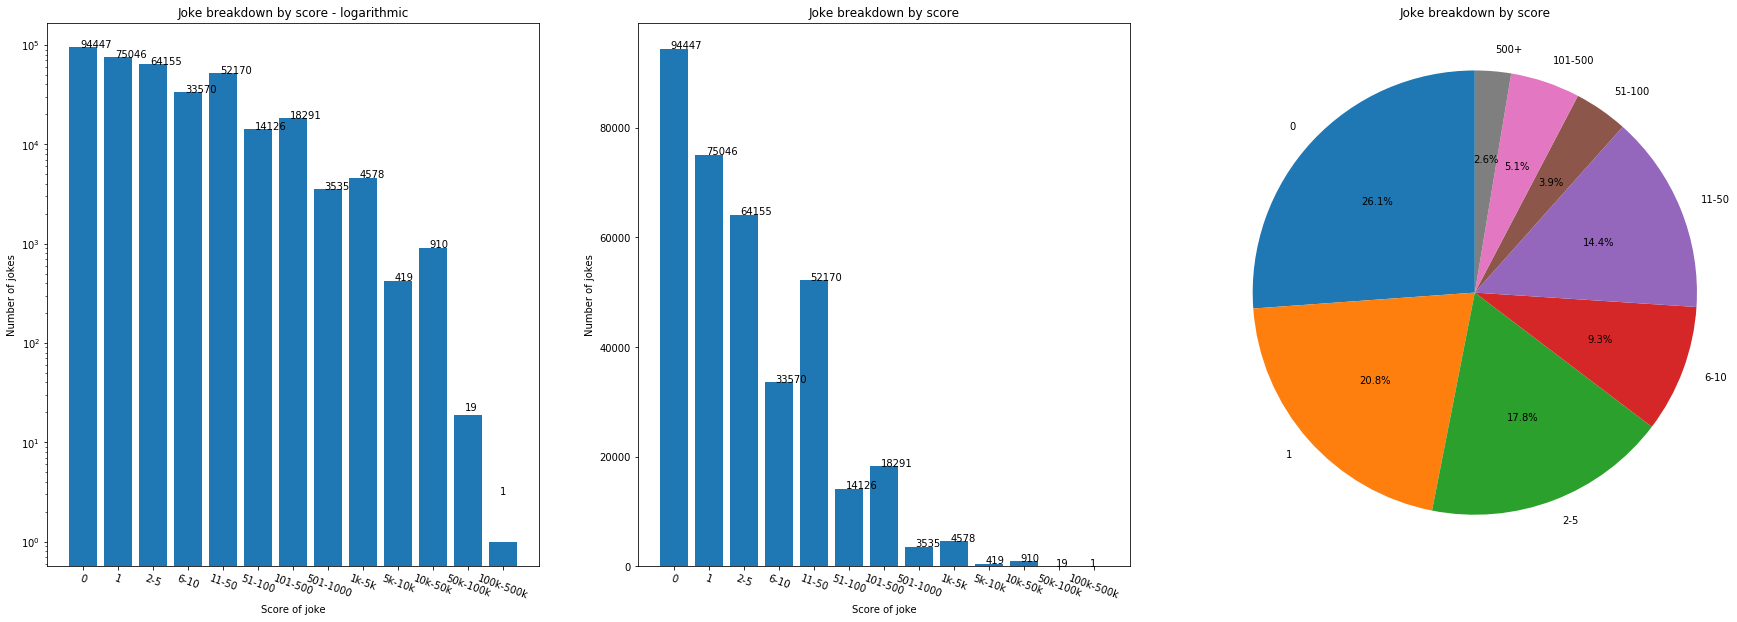

In [91]:
sizes = [jokes_by_score[limit] for limit in score_limits]
xlabels = ['0', '1', '2-5', '6-10', '11-50', '51-100', '101-500', '501-1000', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k'] 
fig, (loga, deci, pi) = plt.subplots(1, 3, figsize=(30, 10))

loga.bar(range(len(score_limits)), sizes)
loga.set_yscale('log')
loga.set_ylabel('Number of jokes')
loga.set_xticks(range(len(score_limits)))
loga.set_xticklabels(xlabels, rotation='-20')
loga.set_xlabel('Score of joke')
loga.set_title('Joke breakdown by score - logarithmic')
for i, v in enumerate([jokes_by_score[limit] for limit in score_limits]):
    loga.text(i - 0.1, v + 2, str(v), color='black')

deci.bar(range(len(score_limits)), sizes)
deci.set_ylabel('Number of jokes')
deci.set_xticks(range(len(score_limits)))
deci.set_xticklabels(xlabels, rotation='-20')
deci.set_xlabel('Score of joke')
deci.set_title('Joke breakdown by score')
for i, v in enumerate([jokes_by_score[limit] for limit in score_limits]):
    deci.text(i - 0.1, v + 2, str(v), color='black')
    
labels = ['0', '1', '2-5', '6-10', '11-50', '51-100', '101-500', '500+']
sizes = [jokes_by_score[0], jokes_by_score[1], jokes_by_score[5], jokes_by_score[10], jokes_by_score[50], jokes_by_score[100], jokes_by_score[500], sum([jokes_by_score[limit] for limit in score_limits[-6:]])]
#explode = (0, 0.1, 0, 0.1)
pi.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
pi.axis('equal')
pi.set_title('Joke breakdown by score')

plt.show()

**Unfortunately our dataset is not evenly distributed at all.**

Yes, it depends how we interpret it - if 10 points is impressive, then yes, our data is diverse.



## Averages

In [92]:
total_score = 0
total_comments = 0
total_count = 0
total_nsfw = 0
total_nsfw_score = 0
total_length = 0

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        total_count += 1
        total_score += joke['score']
        total_comments += joke['num_comments']
        total_length += len(joke['words'])
        if joke['over_18']:
            total_nsfw += 1
            total_nsfw_score += joke['score']
            
print('*** ALL JOKES ***')
print(f'Average score: {total_score/total_count:.2f}')
print(f'Average number of comments: {total_comments/total_count:.2f}')
print(f'Average joke length: {total_length/total_count:.2f} words')
print(f'{100*total_nsfw/total_count:.2f}% of jokes are marked as NSFW(18+) by their authors')
print(f'Average score of NSFW jokes: {total_nsfw_score/total_nsfw:.2f}')
print(f'Average score of non-NSFW jokes: {(total_score-total_nsfw_score)/(total_count-total_nsfw):.2f}')

*** ALL JOKES ***
Average score: 124.55
Average number of comments: 7.54
Average joke length: 23.43 words
2.65% of jokes are marked as NSFW(18+) by their authors
Average score of NSFW jokes: 298.31
Average score of non-NSFW jokes: 119.82


### Conclusions:

I'd say that the outliers (10k+ scored jokes) greatly increase the average score. On average, it seems that NSFW jokes are appreciated almost three times as much.

## Top jokes

In [93]:
total_score = 0
total_comments = 0
total_count = 0
total_nsfw = 0
total_nsfw_score = 0
total_length = 0
top_jokes = []

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        if joke['score'] > 5000:
            top_jokes.append(joke)
            total_count += 1
            total_score += joke['score']
            total_comments += joke['num_comments']
            total_length += len(joke['words'])
            if joke['over_18']:
                total_nsfw += 1
                total_nsfw_score += joke['score']

print('*** TOP JOKES ***')                
print(f'Average score: {total_score/total_count:.2f}')
print(f'Average number of comments: {total_comments/total_count:.2f}')
print(f'Average joke length: {total_length/total_count:.2f} words')
print(f'{100*total_nsfw/total_count:.2f}% of jokes are marked as NSFW(18+) by their authors')
print(f'Average score of NSFW jokes: {total_nsfw_score/total_nsfw:.2f}')
print(f'Average score of non-NSFW jokes: {(total_score-total_nsfw_score)/(total_count-total_nsfw):.2f}')

*** TOP JOKES ***
Average score: 18757.69
Average number of comments: 485.78
Average joke length: 40.92 words
6.97% of jokes are marked as NSFW(18+) by their authors
Average score of NSFW jokes: 19206.27
Average score of non-NSFW jokes: 18724.09


### Conclusions:

We see an increase in all categories. We can assume that with an increase in joke length and marking it NSFW we see an increase in score and in turn, we provoke a greater number of comments.

### Top jokes - words

In [94]:
top_words = []

for joke in top_jokes:
    top_words.extend(joke['words'])
    
word_count = Counter(top_words)
for pair in word_count.most_common(100):
    print(pair)
    

('says', 686)
('man', 533)
('said', 529)
('one', 476)
('im', 314)
('wife', 288)
('get', 278)
('well', 266)
('like', 259)
('asks', 246)
('back', 245)
('dont', 230)
('go', 217)
('asked', 217)
('day', 213)
('would', 213)
('know', 211)
('guy', 204)
('two', 201)
('old', 193)
('woman', 172)
('see', 167)
('got', 163)
('thats', 161)
('time', 160)
('first', 160)
('girl', 149)
('next', 147)
('replies', 144)
('went', 143)
('going', 142)
('take', 139)
('ill', 137)
('want', 135)
('looks', 135)
('could', 134)
('husband', 134)
('home', 132)
('little', 129)
('good', 128)
('people', 128)
('replied', 127)
('son', 125)
('goes', 125)
('told', 125)
('way', 121)
('really', 120)
('father', 119)
('give', 119)
('youre', 118)
('joke', 117)
('cant', 116)
('whats', 114)
('walks', 111)
('dad', 110)
('bar', 109)
('door', 108)
('think', 107)
('oh', 107)
('didnt', 106)
('gets', 106)
('right', 104)
('new', 103)
('tell', 102)
('around', 100)
('never', 99)
('another', 99)
('years', 98)
('doctor', 97)
('boy', 96)
('still

Even so, the words used are as common as ever used in daily themes: words related to the family (wife, husband, son, father, dad), common joke terms (bar, bartender, two - as in "two guys walk into a bar").

## Score vs Comment count

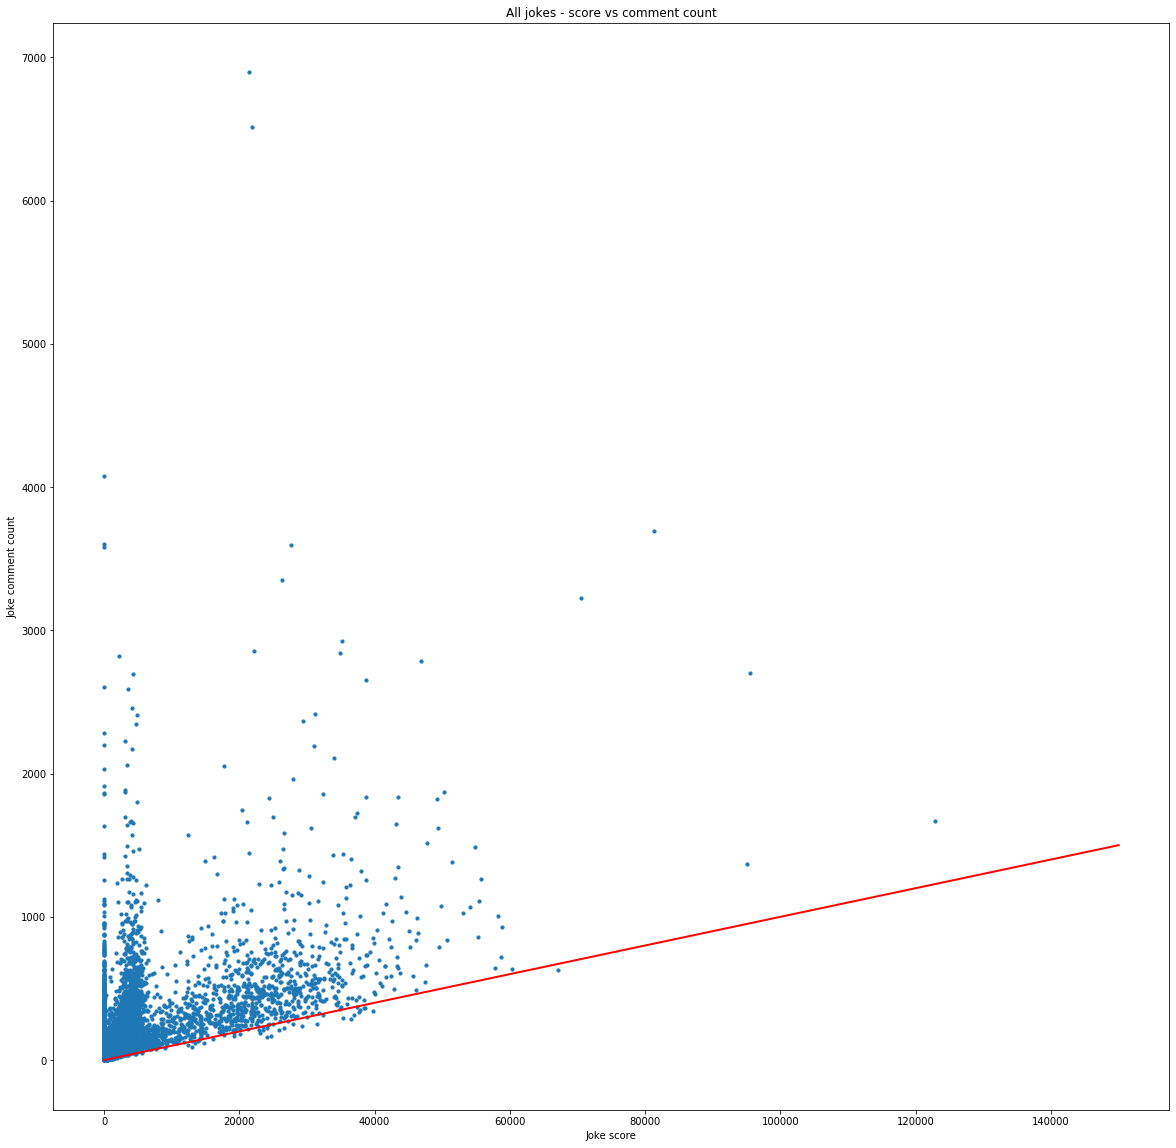

In [95]:
scores = []
com_count = []

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        scores.append(joke['score'])
        com_count.append(joke['num_comments'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.scatter(scores, com_count, s=10)
ax.plot([0, 150000], [0, 1500], 'r', linewidth=2)
ax.set_xlabel('Joke score')
ax.set_ylabel('Joke comment count')
plt.title('All jokes - score vs comment count')
plt.show()

We can clearly a see a trendline here. A better score will bring more comments, in fact it seems it's 99% guaranteed to do so.

Let's zoom in on some areas.

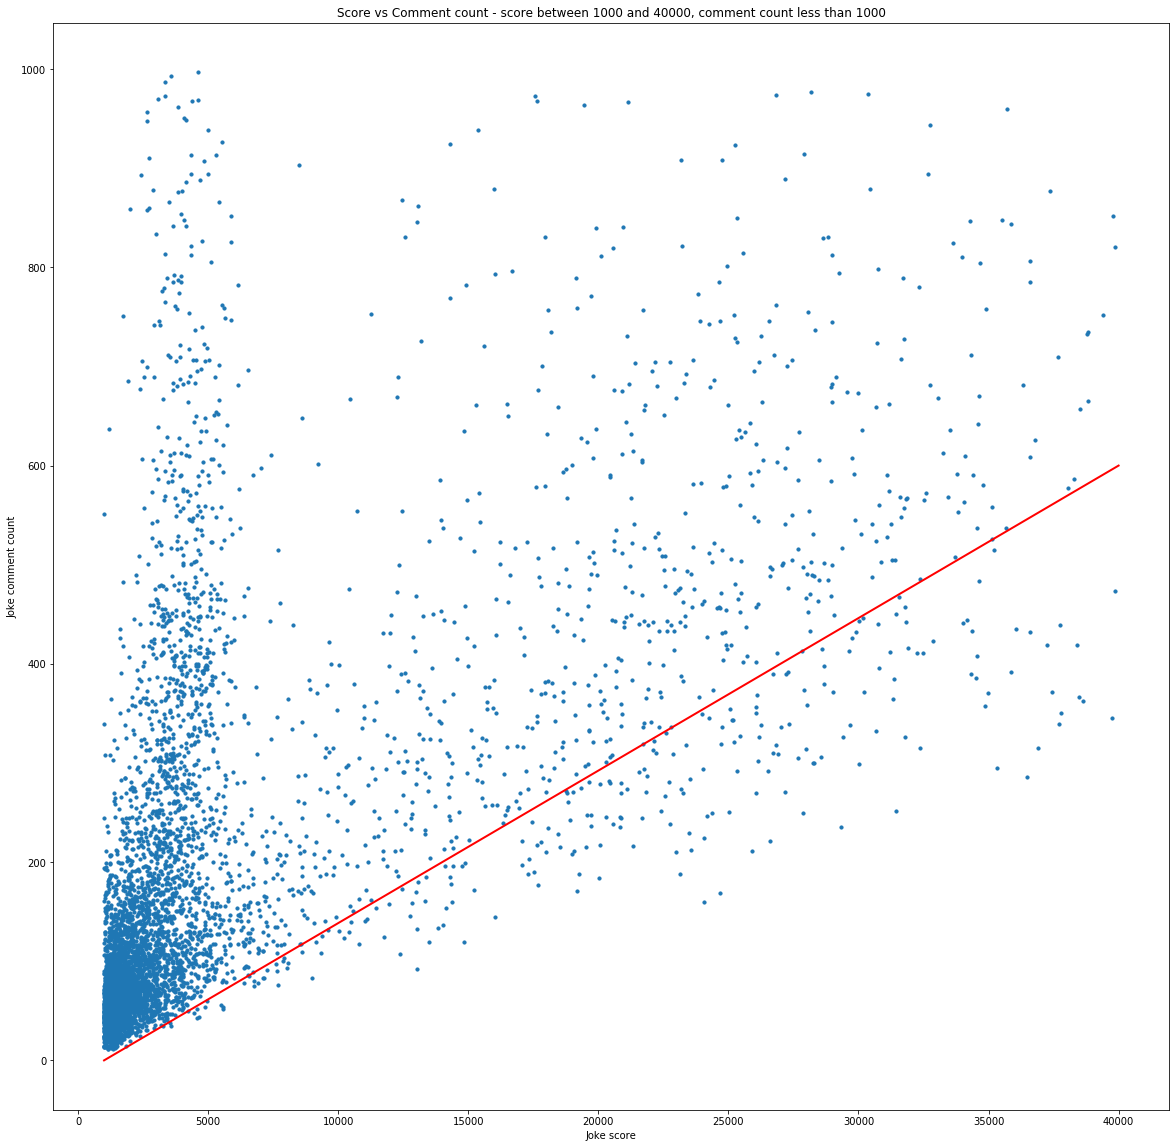

In [96]:
scores = []
com_count = []

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        if joke['score'] > 1000 and joke['score'] < 40000 and joke['num_comments'] < 1000:
            scores.append(joke['score'])
            com_count.append(joke['num_comments'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.scatter(scores, com_count, s=10)
ax.plot([1000, 40000], [0, 600], 'r', linewidth=2)
ax.set_xlabel('Joke score')
ax.set_ylabel('Joke comment count')
plt.title('Score vs Comment count - score between 1000 and 40000, comment count less than 1000')
plt.show()

What is this separation around the 7000 mark? I'd say it's related to the event at which the submission gets posted to the front page, so more people see it.

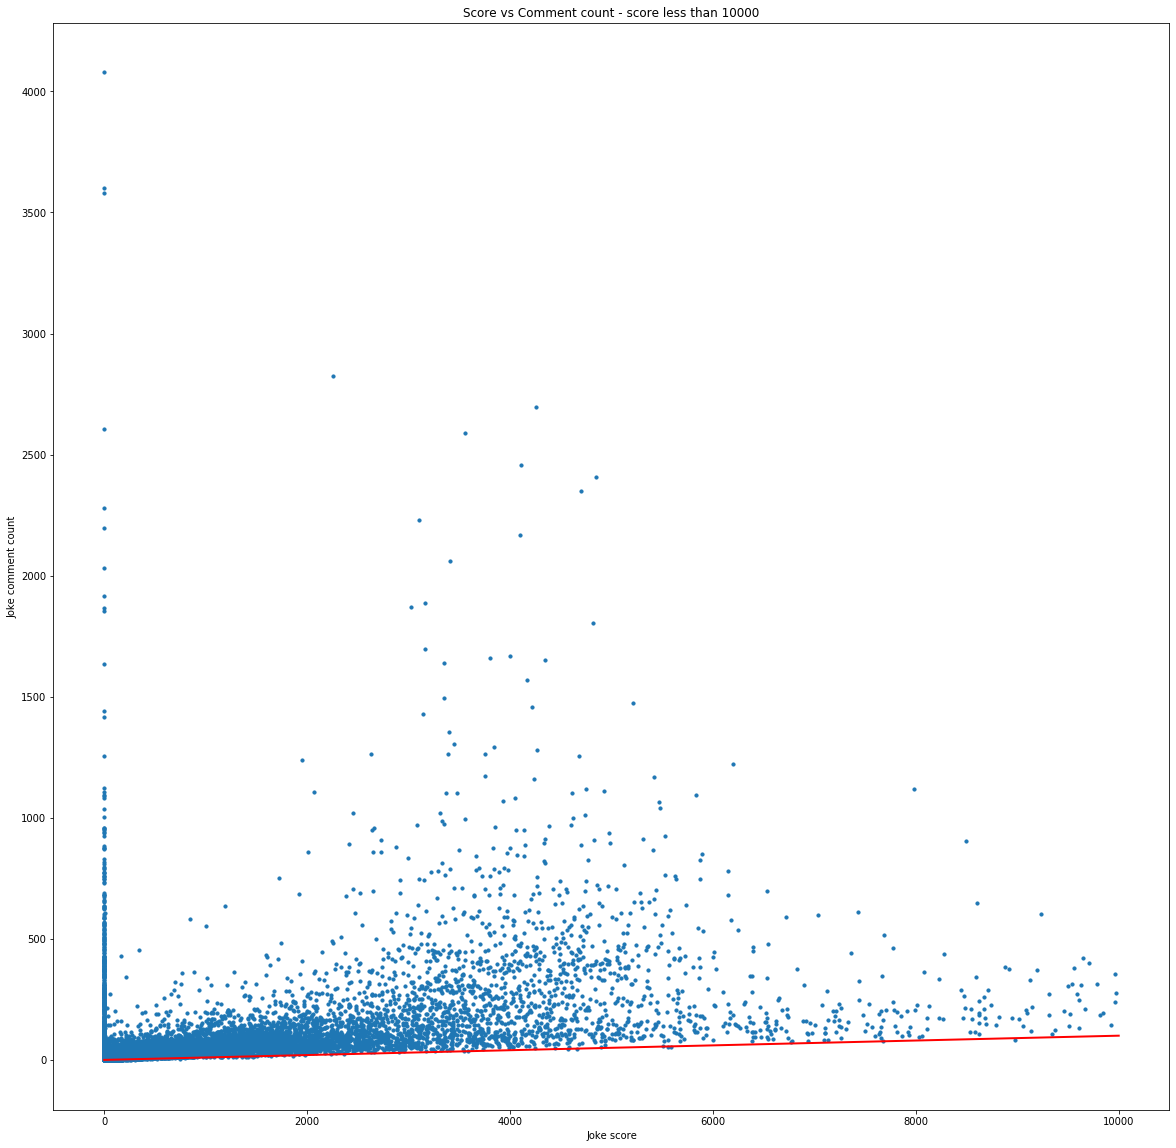

In [97]:
scores = []
com_count = []

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        if joke['score'] < 10000:
            scores.append(joke['score'])
            com_count.append(joke['num_comments'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.scatter(scores, com_count, s=10)
ax.plot([0, 10000], [0, 100], 'r', linewidth=2)
ax.set_xlabel('Joke score')
ax.set_ylabel('Joke comment count')
plt.title('Score vs Comment count - score less than 10000')
plt.show()

Why do so many jokes with a 0-10 score get so many comments? These are most probably the downvoted jokes - i.e. the most controversial jokes. Some are barely getting more upvotes than downvotes while others are downvoted to oblivion - getting an absolute zero score.

Let's filter these out (and the outliers with +250 comments).

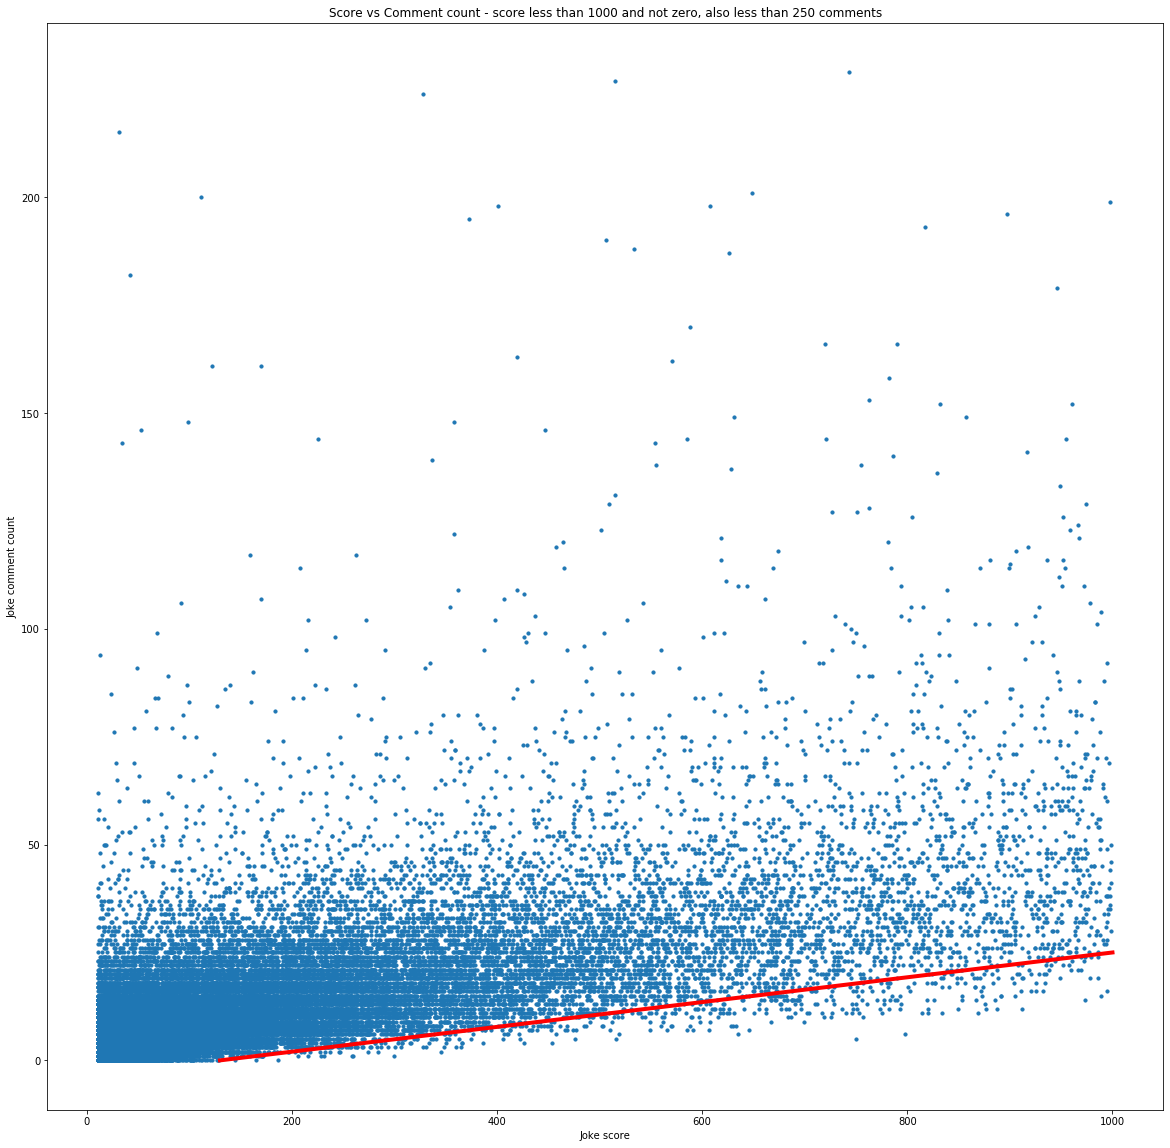

In [98]:
scores = []
com_count = []

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        if joke['score'] > 10 and joke['score'] < 1000 and joke['num_comments'] < 250:
            scores.append(joke['score'])
            com_count.append(joke['num_comments'])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.scatter(scores, com_count, s=10)
ax.plot([130, 1000], [0, 25], 'r', linewidth=4)
ax.set_xlabel('Joke score')
ax.set_ylabel('Joke comment count')
plt.title('Score vs Comment count - score less than 1000 and not zero, also less than 250 comments')
plt.show()

# Classifier

In [99]:
# Extract only the score and the words
texts = []
scores = []

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        texts.append(' '.join(joke['words']))
        scores.append(joke['score'])

In [100]:
# balanced_x = texts
# balanced_y = scores


# from sklearn.feature_extraction.text import TfidfVectorizer
# import datetime

# # This vectorizer breaks text into single words and bi-grams
# # and then calculates the TF-IDF representation
# vectorizer = TfidfVectorizer(ngram_range=(1, 2))
# t1 = datetime.datetime.now()

# # the 'fit' builds up the vocabulary from all the reviews
# # while the 'transform' step turns each indivdual text into
# # a matrix of numbers.
# vectors = vectorizer.fit_transform(balanced_x)
# print(datetime.datetime.now() - t1)

In [101]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)

In [102]:
# from sklearn.svm import LinearSVC

# # initialise the SVM classifier
# classifier = LinearSVC()

# # train the classifier
# t1 = datetime.datetime.now()
# classifier.fit(X_train, y_train)
# print(datetime.datetime.now() - t1)

Tried to run this and the kernel crashed - running it with the python shell gives me a segmentation fault. I suspect it's a memory issue (too much data).

So let's take a closer look at the score distribution.

(I should've started with a scatterplot from the beginning.)

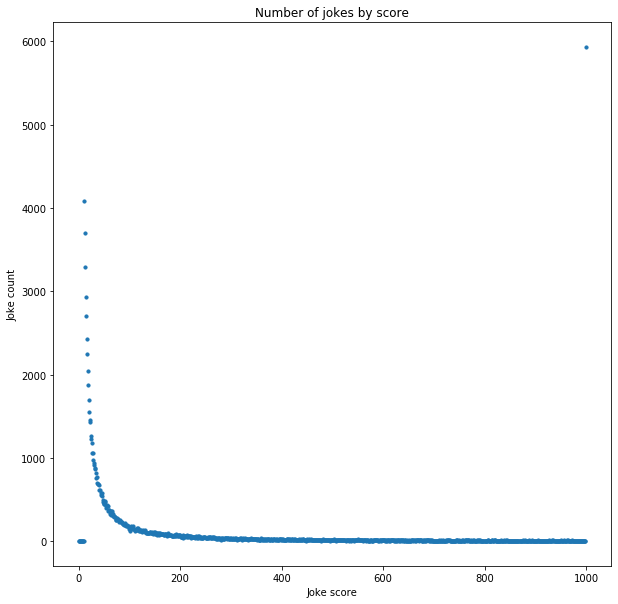

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

scores = range(0, 1001)
count = [0]*1001

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        if joke['score'] > 999:
            count[1000] +=1
        elif joke['score'] > 10:
            count[joke['score']] += 1
ax.scatter(scores, count, s=10)
ax.set_xlabel('Joke score')
ax.set_ylabel('Joke count')
ax.set_title('Number of jokes by score')

plt.show()

After reaching this point, I realized I severely overestimated the capabilities of this dataset - I had to redo the labels up above at the initial breakdown by score, because at the beginning I used just 0, 1-100, 100-500, and so on. Now, reaching this, I've seen that there is a great imbalance towards jokes of really low scores, 0-10.

But then I remembered that this category had some real spikes when it comes to comments - let's look again at that.

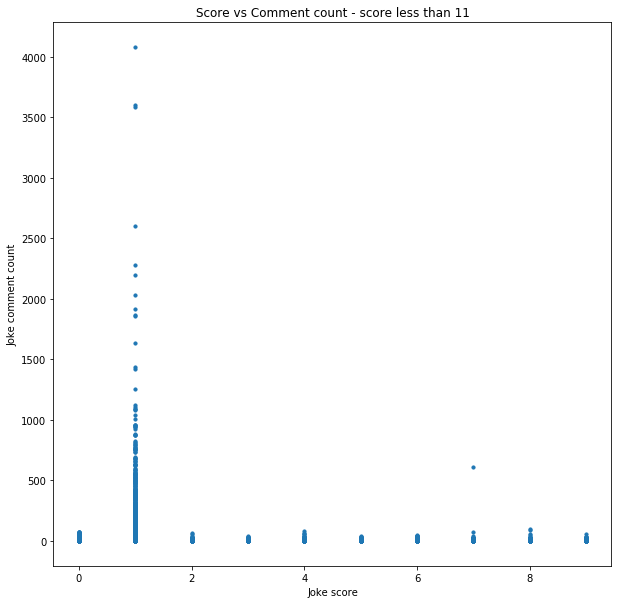

In [107]:
fig, bx = plt.subplots(1, 1, figsize=(10, 10))

scores = []
com_count = []
controversial = []

years = range(2010, 2020)
for year in years:
    for joke in jokes[year]:
        if joke['score'] < 10:
            scores.append(joke['score'])
            com_count.append(joke['num_comments'])
            if joke['num_comments'] > 500 and joke['score'] == 7:
                controversial.append(joke)

bx.scatter(scores, com_count, s=10)
bx.set_xlabel('Joke score')
bx.set_ylabel('Joke comment count')
bx.set_title('Score vs Comment count - score less than 11')

plt.show()

Let's get a taste of what controversial means:

In [109]:
for entry in controversial:
    print((f'Comments: {entry["num_comments"]}', entry['score'], entry['url'], entry['words']))

('Comments: 608', 7, 'https://www.reddit.com/r/Jokes/comments/9y7wxu/what_organ_can_expand_to_10_times_its_size/', ['organ', 'expand', '10', 'times', 'size', '6th', 'grade', 'science', 'teacher', 'mrs', 'parks', 'asked', 'class', 'human', 'body', 'part', 'increases', 'ten', 'times', 'size', 'stimulated', 'one', 'answered', 'teacher', 'picked', 'random', 'student', 'little', 'mary', 'stood', 'said', 'asking', 'sixth', 'graders', 'question', 'like', 'im', 'going', 'tell', 'parents', 'go', 'tell', 'principal', 'fire', 'mrs', 'parks', 'ignored', 'asked', 'question', 'body', 'part', 'increases', '10', 'times', 'size', 'stimulated', 'little', 'marys', 'mouth', 'fell', 'open', 'said', 'around', 'boy', 'going', 'get', 'big', 'trouble', 'teacher', 'continued', 'ignore', 'said', 'class', 'anybody', 'finally', 'billy', 'stood', 'looked', 'around', 'nervously', 'said', 'body', 'part', 'increases', '10', 'times', 'size', 'stimulated', 'pupil', 'eye', 'mrs', 'parks', 'said', 'good', 'billy', 'turned